# Homework



In [1]:
# Evaluation
from HW.evaluate import evaluate

#file = open('HW/annotations.pickle','rb')
#predictions = pickle.load(file)

evaluate(predictions)

ModuleNotFoundError: ignored

# Tradition



In [1]:
#******************INIT*******************
!pip install -U torch torchvision numpy opencv-python



# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip


!git clone https://github.com/szykry/CVML_HW.git

# Set root folder
import os
name = "/content/HW/"
os.chdir(name)
!pwd

 #OpenCV
import cv2

#Numpy - numeric library
import numpy as np

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline

#*******************END OF INIT*************

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.4)
     |████████████████████████████████| 28.2MB 112kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
--2020-05-24 08:09:44--  http://deeplearning.iit.bme.hu/CVS/HW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14446460 (14M) [application/zip]
Saving to: ‘HW.zip’

HW.zip              100%[=================

In [3]:
# Get all subfolders in a directory
import os
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]

NameError: ignored

In [5]:
# Get all files with extension in a directory
import glob
import re
 
def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)
 
names = sorted_nicely(glob.glob1(path, "*.extension"))

NameError: ignored

In [0]:
# Class names
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

In [0]:
import torch
import torch.nn as nn
import torchvision
import os
import sys
import glob
import re
import numpy as np
import matplotlib.pyplot as plt

from torch import optim
from torchvision import transforms, datasets, get_image_backend
from torchvision.datasets import ImageFolder
from PIL import Image
from IPython.display import HTML, display

In [0]:
class ConvNet(nn.Module):

    def init(self, base_channels=16, in_channels=3, num_classes=55):  # base: csatorna növekedéshez, in: RGB
        super().init()

        # Filters
        self.c11 = Conv(in_channels, base_channels)
        self.c12 = Conv(base_channels, base_channels)
        self.d1  = Conv(base_channels, base_channels2, stride=2) # Downscale using strided convolution and expand channels

        self.c21 = Conv(base_channels2, base_channels2)
        self.c22 = Conv(base_channels2, base_channels2)
        self.d2  = Conv(base_channels2, base_channels4, stride=2)

        self.c31 = Conv(base_channels4, base_channels4)
        self.c32 = Conv(base_channels4, base_channels4)
        self.d3  = Conv(base_channels4, base_channels8, stride=2)

        self.c41 = Conv(base_channels8, base_channels8)
        self.c42 = Conv(base_channels8, base_channels8)
        self.d4  = Conv(base_channels8, base_channels16, stride=2)

        self.c51 = Conv(base_channels16, base_channels16)
        self.c52 = Conv(base_channels16, base_channels16)
        self.d5  = Conv(base_channels16, base_channels32, stride=2) 

        # Input image is 32x32 -> after 5 downscaling the activation map is 1x1
        # [batch, ch, h, w]  -> [batch, ch] linearisba, h=1, w=1
        # Classifier is a normal 1x1 convolution that produces num_classes class scores
        # This layer does not have BatchNorm or ReLU

        self.classifier = nn.Conv2d(base_channels32, num_classes, kernel_size=1)

    def forward(self,x):

        x = self.d1(self.c12(self.c11(x)))
        x = self.d2(self.c22(self.c21(x)))
        x = self.d3(self.c32(self.c31(x)))
        x = self.d4(self.c42(self.c41(x)))
        x = self.d5(self.c52(self.c51(x)))

        return torch.squeeze(self.classifier(x))    # After squeeze is becomes (batch_size x num_classes)

class Conv(nn.Module):

    def init(self, in_channels, channels, k_size=3, stride=1):
        super().init()

        self.conv = nn.Conv2d(in_channels, channels, k_size, stride=stride, padding=k_size//2, bias=False)
        self.bn = nn.BatchNorm2d(channels)

    def forward(self,x):
        return self.bn(torch.relu(self.conv(x)))

net=ConvNet()
if torch.cuda.is_available():
  net = net.cuda()


In [0]:
def mergeTheCloseRectanglesR(rectangles,thresh=30):
    #make bigger rect if some rects are close to each other
    #print("Merger")
    for i in range(len(rectangles)):
      for j in range(len(rectangles)):
        if(i>=j):
          continue
        #print(str(i) + str(j)) 
        distance = calculateCenterDistanceR(rectangles[i],rectangles[j])
        #print(distance)
        if(distance < thresh):
          rectangles[i]=makeBigerRectR(rectangles[i],rectangles[j])
          rectangles[j]=rectangles[i]
          #print("At least 2 rects are merged")
    deleteSameSizeRectsR(rectangles)
    return rectangles
def calculateCenterDistanceR(rectangle1, rectangle2):
    r1centerx=rectangle1[0]+(rectangle1[2]/2)
    r2centerx=rectangle2[0]+(rectangle2[2]/2)
    r1centery=rectangle1[1]+(rectangle1[3]/2)
    r2centery=rectangle2[1]+(rectangle2[3]/2)
    distance = np.sqrt(abs((r1centerx-r2centerx)**2+(r1centery-r2centery)**2))
    return distance
def makeBigerRectR(first, second):
    result = []

    x = getLower(first[0],second[0])
    xLen= getGreater(first[0]+first[2],second[0]+second[2]) - x

    y = getLower(first[1],second[1])
    yLen= getGreater(first[1]+first[3],second[1]+second[3]) - y

    if(x>y):
        radius = yLen/2
    else:
        radius = xLen/2

    centerX = x+(xLen/2)
    centerY = y+(yLen/2)

    return (x,y,xLen,yLen)

def deleteSameSizeRectsR(rectangles):
    outRectangle=[]
    #print("SameSizeDeleter")
    #delete the same size rects
    for i in range(len(rectangles)):
      isNew=True
      for j in range(len(rectangles)):
        if(i >= j):
          continue
        if(True ==((abs(rectangles[i][0]-rectangles[j][0]) < 10) & (abs(rectangles[i][1]-rectangles[j][1]) < 10) & ((calculateCenterDistanceR(rectangles[i], rectangles[j])) < 20))):
          isNew=False
          #print("Deleted same size rect")
      if(isNew == True):
        outRectangle.append(rectangles[i])
        #print("ADDED")
    return outRectangle


def cropper(image,boundingbox,depth_filter,debug=False):

  image2    = cv2.cvtColor(image.copy(),cv2.COLOR_BGR2RGB)
  

  #kernel = np.array([[-1,-1,-1], [-1,11,-1], [-1,-1,-1]])
  #image2 = cv2.filter2D(image2, -1, kernel)

  img_gray = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

  start = (int(boundingbox[0]),int(boundingbox[1]))
  end   = (int(boundingbox[0]+boundingbox[2]) , int(boundingbox[1]+boundingbox[3]))
  mask  = np.zeros(image.shape,dtype=np.uint8)
  mask  = cv2.rectangle(mask,start, end,(255,255,255),-1)
  mask  = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
  maskwidth= boundingbox[2]
  print(start[0])
  img_gray = cv2.bitwise_and(img_gray,img_gray, mask=mask).astype('uint8')

  if debug:
    plt.figure(figsize=(15,15))
    plt.imshow(img_gray,cmap='gray')
  ret, img_gray = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  
  img_gray = cv2.bitwise_and(img_gray,img_gray, mask=mask).astype('uint8')
  img_gray = cv2.bitwise_and(img_gray,img_gray, mask=depth_filter).astype('uint8')

  kernel  = np.ones((3,3),np.uint8)
  img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel,iterations=7)

  sure_fg = cv2.erode(img_gray,kernel,iterations=5)
  sure_bg = cv2.dilate(img_gray,kernel,iterations=2)
  unknown = cv2.subtract(sure_bg,sure_fg)
  ret, markers = cv2.connectedComponents(sure_fg)
  markers = markers+1
  markers[unknown==255] = 0
  markers = cv2.watershed(image2,markers)
  image2[markers == -1] = [255,0,0]

  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(sure_fg,cmap='gray')
  
  rects =[]

  for i in np.unique(markers):
    if i==0 | i==-1:
      continue
    tabla = np.where(markers == i,255,0).astype('uint8')
    Xmin,Xmax,Ymin,Ymax = minMaxLoc(tabla)
    xCenter = (Xmax+Xmin)/2
    yCenter = (Ymax+Ymin)/2
    w = Xmax-Xmin
    h = Ymax-Ymin
    if w<32:
      w=32
    if h<32:
      h=32
    x=int(xCenter-w/2)
    y=int(yCenter-h/2)
    if x<0:
      x=0
    if y<0:
      y=0
    rects.append((x,y,w,h))

  if debug:
    plt.figure(figsize=(15,15))
    plt.imshow(markers)

  if (len(rects)>4):
    truerects= mergeTheCloseRectanglesR(rects,np.floor(maskwidth/4))
  else:
    truerects=rects

  return truerects

'''def prepNeural():
  
  return net'''

def neuralLabeler(img):
  img = torch.from_numpy(img)
  img = img.permute(2,0,1)

  input = torch.zeros(1,3,32,32)
  input[0] = img

  if torch.cuda.is_available():
    input = input.cuda()

  net = torch.load("/content/CVML_HW/model/pyVision_5.pth")
  net.eval()  
  output = net(input)

  _ , pred = torch.max(output, 0)
  return pred

def signFinder(imgBe,dFilter,imgOut,bigsigns,folderName="",picName="",debug=False,output=False):
  boundingboxes=[]
  for j,b in enumerate(bigsigns):
    for i,r in enumerate(cropper(imgBe,b,dFilter,debug=debug)):
      if i==0:
        continue
      (x,y,w,h) = r
      cv2.rectangle(imgOut,(x,y),(x+w,y+h),(255,0,0),1)
      tabla = imgBe[y:y+h,x:x+w].copy()
      tabla = cv2.resize(tabla,(32,32),interpolation=cv2.INTER_CUBIC)
      #net = prepNeural()
      signtype=neuralLabeler(tabla)
      boundingboxes.append(((np.floor(x+w/2),np.floor(y+h/2),w,h),'traffic sign',subclassNames[0][signtype.cpu().item()]))
      cv2.putText(imgOut,subclassNames[0][signtype.cpu().item()],(x,y+10),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5,(255,0,0))
      if output:
        cv2.imwrite("/content/HW/pics/"+folderName+"_"+picName+"_"+str(j)+"."+str(i)+"ts.jpg",tabla)

  return boundingboxes

In [0]:
def objFinder(img, val):
    threshold = val
    canny_output = cv2.Canny(img, threshold, threshold * 2)
    contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])

    outRectangle=[]
    for i in range(len(boundRect)):
      if (int(boundRect[i][2]) > 10) & (int(boundRect[i][3]) > 10):
        outRectangle.append((boundRect[i],centers[i],radius[i]))
    return outRectangle


def makeMaskWithColorRanges(img,low_ranges,high_ranges):
    firstFor = True
    for i in range(len(low_ranges)):
        maszk=cv2.inRange(img,low_ranges[i],high_ranges[i])
        if(firstFor == True):
            result = maszk
            firstFor = False
        else:
          result=cv2.add(result,maszk)
    #plt.figure(figsize=(5,5))
    #plt.imshow(result,cmap='gray')
    kernel = np.ones((5,5),np.uint8)
    result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel, iterations = 2)
    result = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel, iterations = 1)
    result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel, iterations = 2 )
    #plt.figure(figsize=(5,5))
    #plt.imshow(result,cmap='gray')
    return result

def getGreater(first,second):
    if(first>second):
        return first
    else:
        return second

def getLower(first,second):
    if(first<second):
        return first
    else:
        return second

def makeBigerRect(first, second):
    result = []

    x = getLower(first[0][0],second[0][0])
    xLen= getGreater(first[0][0]+first[0][2],second[0][0]+second[0][2]) - x

    y = getLower(first[0][1],second[0][1])
    yLen= getGreater(first[0][1]+first[0][3],second[0][1]+second[0][3]) - y

    if(x>y):
        radius = yLen/2
    else:
        radius = xLen/2

    centerX = x+(xLen/2)
    centerY = y+(yLen/2)

    return ((x,y,xLen,yLen),(centerX,centerY),(radius))
    
def deleteSameSizeRects(rectangles):
    outRectangle=[]
    #print("SameSizeDeleter")
    #delete the same size rects
    for i in range(len(rectangles)):
      isNew=True
      for j in range(len(rectangles)):
        if(i >= j):
          continue
        if(True ==((abs(rectangles[i][0][0]-rectangles[j][0][0]) < 10) & (abs(rectangles[i][0][1]-rectangles[j][0][1]) < 10) & (abs(rectangles[i][2]-rectangles[j][2]) < 20))):
          isNew=False
          #print("Deleted same size rect")
      if(isNew == True):
        outRectangle.append(rectangles[i])
        #print("ADDED")
    return outRectangle

def calculateCenterDistance(rectangle1, rectangle2):
    p1=rectangle1[1]
    p2=rectangle2[1]
    distance = np.sqrt(abs((p1[0]-p2[0])**2+(p1[1]-p2[1])**2))
    return distance

def mergeTheCloseRectangles(rectangles):
    #make bigger rect if some rects are close to each other
    #print("Merger")
    for i in range(len(rectangles)):
      for j in range(len(rectangles)):
        if(i>=j):
          continue
        #print(str(i) + str(j))   
        distance = calculateCenterDistance(rectangles[i],rectangles[j])
        #print(distance)
        if(distance < 150):
          rectangles[i]=makeBigerRect(rectangles[i],rectangles[j])
          rectangles[j]=rectangles[i]
          #print("At least 2 rects are merged")
    deleteSameSizeRects(rectangles)
    return rectangles

def deleteSmallObjects(rectangles,treshold):
    outRects = []
    for i in range(len(rectangles)):
        if(((rectangles[i][0][2]>treshold) | (rectangles[i][0][3]>treshold)) & (rectangles[i][2]>treshold*0.3)):
            outRects.append(rectangles[i])
        #else:
          #print("Too Small")
    return outRects

def deleteBackground(depth):
    sor =depth[0,:]
    legelsoAtlag=np.true_divide(sor.sum(),np.count_nonzero(sor))
    hatsoMaszk =  np.zeros((480,640)).astype("uint8")
    hatsoMaszk[depth<legelsoAtlag * 0.6]=[1]
    return hatsoMaszk

def makeMaskFromRect(rect):
    rectMaszk =  np.zeros((480,640)).astype("uint8")
    xmin =rect[0][0]-30
    xmax = rect[0][0]+rect[0][2]+30
    ymin = rect[0][1]-30
    ymax = rect[0][1]+rect[0][3]+30

    if(xmin < 0):
        xmin=0
    if(ymin < 0):
        ymin=0
    if(xmax > 639):
        xmax=639
    if(ymax > 479):
        ymax=479

    #print(xmin)
    #print(ymin)
    #print(xmax)
    #print(ymax)
    #print(str(xmin)+" "+str(xmax)+" "+str(ymin)+" "+str(ymax)+" ")
    rectMaszk[ymin:ymax,xmin:xmax]=[1]
    return rectMaszk

def countFilteredValue(image,valueLow, valueHigh):
    tempImage = image.copy()
    lower_range = (0,0,valueLow)
    upper_range = (255,255,valueHigh)
    mask=cv2.inRange(image,lower_range,upper_range)
    return np.count_nonzero(mask)

def isPlane(image,rect):
    tempImage = image.copy()
    rectMask = makeMaskFromRect(rect)

    #print(rect)

    lower_range = (16,100,100)
    upper_range = (25,255,255)
    tempMaszk=cv2.inRange(tempImage,lower_range,upper_range)
    sargaMaszk = cv2.bitwise_and(rectMask,rectMask,mask = tempMaszk)
    sargaDarab = np.count_nonzero(sargaMaszk)
    #print("sarga: "+str(sargaDarab))

    
    lower_range = (0,0,0)
    upper_range = (6,255,255)
    tempMaszk=cv2.inRange(tempImage,lower_range,upper_range)
    rectMask = cv2.bitwise_and(rectMask,rectMask,mask = tempMaszk)
    tempImage = cv2.bitwise_and(tempImage,tempImage,mask = rectMask)
    lowRed = countFilteredValue(tempImage,10,155)
    highRed = countFilteredValue(tempImage,135,255)

    #print(lowRed)
    #print(highRed)
    if((lowRed < highRed) or ((sargaDarab > 15) and ((lowRed/highRed)<1.2)) or ((sargaDarab > 70) and ((lowRed/highRed)<1.4)) or ((sargaDarab > 300))):
        #print("it is a PLANE <3")
        return True
    else:
        return False
    return False

In [0]:
def findRedAndYellowVehicle(imgBGR,depthIn, debug = False):
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)

    hastsoMaszk = deleteBackground(depthIn)

    

    imgHSV = cv2.bitwise_and(imgHSV,imgHSV,mask = hastsoMaszk)

    if debug:
      plt.figure(figsize=(5,5))
      plt.imshow(imgHSV,cmap='gray')

    lower_range = ((0,195,80),(170,195,80))
    upper_range = ((6,255,255),(180,255,255))
    imgOut = makeMaskWithColorRanges(imgHSV,lower_range,upper_range)

    if debug:
      plt.figure(figsize=(5,5))
      plt.imshow(imgOut,cmap='gray')

    outRedRectangle = objFinder(imgOut,100)



    outRedRectangle = mergeTheCloseRectangles(outRedRectangle)  

    outRedRectangle = deleteSmallObjects(outRedRectangle,30)

    outRedRectangle=deleteSameSizeRects(outRedRectangle)

    if debug:
      print(outRedRectangle)
          
    if debug:
      print("yellow")

    #***YELLOW FINDER***      

    lower_range = ((10,210,200),(10,210,200))
    upper_range = ((30,255,255),(30,255,255))
    imgOut = makeMaskWithColorRanges(imgHSV,lower_range,upper_range)
    if debug:
      plt.figure(figsize=(5,5))
      plt.imshow(imgOut,cmap='gray')

    outYellowRectangle = objFinder(imgOut,100)

    

    outYellowRectangle = mergeTheCloseRectangles(outYellowRectangle)  

    outYellowRectangle = deleteSmallObjects(outYellowRectangle,35)
    outYellowRectangle=deleteSameSizeRects(outYellowRectangle)
    
    if debug:
      print(outYellowRectangle)

    rectStruct = []


    for i in range(len(outYellowRectangle)):
        color = (255,255,0)
        cv2.rectangle(imgRGB, (int(outYellowRectangle[i][0][0]), int(outYellowRectangle[i][0][1])), \
          (int(outYellowRectangle[i][0][0]+outYellowRectangle[i][0][2]), int(outYellowRectangle[i][0][1]+outYellowRectangle[i][0][3])), color, 2)
        
        cv2.putText(imgRGB,"Truck",(outYellowRectangle[i][0][0],outYellowRectangle[i][0][1]-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,(255,255,0))
        rectStruct.append( ( (int(outYellowRectangle[i][0][0]), \
                            int(outYellowRectangle[i][0][1]), \
                            int(outYellowRectangle[i][0][2]) , \
                            int(outYellowRectangle[i][0][3]) )  , "Vehicle", "Truck") )
    

    outRedRectangleFinal = []
    for i in range(len(outRedRectangle)):
        color = (255,0,0)
        itIsTruck = False
        for j in range(len(outYellowRectangle)):
            distance= calculateCenterDistance(outRedRectangle[i],outYellowRectangle[j])
            if(distance < 120):
                itIsTruck = True
                #print("truck part")
        if(itIsTruck == False):
            outRedRectangleFinal.append(outRedRectangle[i])
            cv2.rectangle(imgRGB, (int(outRedRectangle[i][0][0]), int(outRedRectangle[i][0][1])), \
              (int(outRedRectangle[i][0][0]+outRedRectangle[i][0][2]), int(outRedRectangle[i][0][1]+outRedRectangle[i][0][3])), color, 2)
            boolTemp = isPlane(imgHSV,outRedRectangle[i])
            if(boolTemp):
                cv2.putText(imgRGB,"Plane <3",(outRedRectangle[i][0][0],outRedRectangle[i][0][1]-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,(255,0,0))
                rectStruct.append( ( (int(outRedRectangle[i][0][0]),
                                     int(outRedRectangle[i][0][1]) , 
                                     int(outRedRectangle[i][0][2]) , \
                                     int(outRedRectangle[i][0][3])) , "Vehicle", "Plane") )
            else:
                cv2.putText(imgRGB,"Car",(outRedRectangle[i][0][0],outRedRectangle[i][0][1]-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,(255,0,0))
                rectStruct.append( ( (int(outRedRectangle[i][0][0]),
                                      int(outRedRectangle[i][0][1]) , 
                                      int(outRedRectangle[i][0][2]) , \
                                      int(outRedRectangle[i][0][3])) , "Vehicle", "Car") )

    return imgRGB , rectStruct

In [0]:
def minMaxLoc(img):
  Xmin = 999;
  Xmax = 0;
  Ymin = 999;
  Ymax = 0;
  
  for i in range(img.shape[0]):
    sor =img[i,:]
    mean=np.count_nonzero(sor)
    if ((Ymin == 999) & (mean > 0)):
      Ymin=i
    if ( mean > 0):
      Ymax = i

  for i in range(img.shape[1]):
    oszlop =img[:,i]
    mean=np.count_nonzero(oszlop)
    if ((Xmin == 999) & (mean > 0)):
      Xmin=i
    if ( mean > 0):
      Xmax = i

  return Xmin,Xmax,Ymin,Ymax

def watershed(edges,img,debug=False):
  kernel = np.ones((3,3),np.uint8)
  #widen edges to make them touch
  edges = cv2.dilate(edges, kernel,iterations=1)

  ret, thresh = cv2.threshold(edges,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(thresh,cmap='gray')

  sure_fg = cv2.erode(thresh,kernel,iterations=1)
  sure_bg = cv2.dilate(thresh,kernel,iterations=1)

  # Uncertain region(borders)
  unknown = cv2.subtract(sure_bg,sure_fg)

  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(sure_fg,cmap='gray')

  # Label separate foreground pathes
  ret, markers = cv2.connectedComponents(sure_fg)
      
  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1
  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0

  if debug:
    plt.figure(figsize=(7,7))
    plt.imshow(markers)
    
  # Runwatershed
  markers = cv2.watershed(img,markers)
  if debug:
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(markers)
    plt.subplot(1,2,2)
    plt.imshow(img)

  return markers

def makeBoundingBox(image):
  imagecopy = image.copy()
  imagecopy = cv2.cvtColor(imagecopy,cv2.COLOR_RGB2GRAY)
  imagecopy[imagecopy != 0] = 255;

  xmin,xmax,ymin,ymax = minMaxLoc(imagecopy)

  rect = (xmin,ymin,xmax-xmin,ymax-ymin)

  #rects = objFinder(imagecopy,100,10,10)

  #for i in range(len(rects)):
  #color = (255,255,0)
  #cv2.rectangle(imagecopy, (rect[0],rect[1]), (rect[0]+rect[2],rect[1]+rect[3]), color, 2)


  #plt.figure(figsize=(20,20))
  #plt.imshow(imagecopy,cmap='gray')
  return rect
  #contours,  = c

In [0]:
#aktualis depsegmenter 23:10
def depth_segmenter(inputImage, inputDepthImage, debug=False):
  # Read images
  img = inputImage.copy()
  depth = inputDepthImage.copy()

  sor =depth[0,:]
  legelsoAtlag=np.true_divide(sor.sum(),np.count_nonzero(sor))

  #hatsoMaszk=cv2.inRange(depth, legelsoAtlag*0.9, np.amax(depth))
  hatsoMaszk =  np.zeros((480,640)).astype("uint8")
  hatsoMaszk[depth<legelsoAtlag*0.6]=[1]

  if debug:
    plt.figure(figsize=(20,20))
    plt.imshow(hatsoMaszk,cmap='gray')

  # convert to RGB
  img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

  lower_range = np.array([90,0,0])
  upper_range = np.array([120,255,220])

  maszk=cv2.inRange(img_hsv, lower_range, upper_range)

  maszkNegative = cv2.bitwise_not(maszk)
  
  if debug:
    out = cv2.bitwise_and(img_hsv,img_hsv,mask = maszkNegative)
    plotolni = cv2.cvtColor(out, cv2.COLOR_HSV2RGB)
    plt.figure(figsize=(20,20))
    plt.imshow(plotolni,cmap='gray')

  hue_channel = img_hsv[:,:,0]
  avg_hue = np.average(hue_channel)
  asdasd, hue_channel_segment = cv2.threshold(hue_channel,avg_hue,255,cv2.THRESH_BINARY)
  kernel = np.ones((5,5),np.uint8)
  maszkDilation = cv2.erode(hue_channel_segment,kernel,iterations = 2)

  maszkDilation = cv2.bitwise_not(maszkDilation)
  maszkNegative = cv2.bitwise_and(maszkDilation,maszkDilation,mask = maszkNegative)
  maszkNegative = cv2.bitwise_and(maszkNegative,maszkNegative,mask = hatsoMaszk)
  
  if debug:
    plt.figure(figsize=(20,20))
    plt.imshow(maszkNegative,cmap='gray')

  # calculate foreground
  for i in range(depth.shape[0]):
    sor =depth[i,:]
    mean=np.true_divide(sor.sum(),np.count_nonzero(sor))
    sor[sor>mean-20]=0

  # for some reason doesn't work without this
 # depth2[depth==0]=0
 # img_rgb = np.where(depth2 != 0, img_rgb, [0,0,0])

  # Figure with subplots
  if debug:
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb) 
    plt.subplot(1,2,2)
    plt.imshow(depth,cmap='gray')

  # convert to uint8 from uint16
  cv2.normalize(depth, depth, 0, 255, cv2.NORM_MINMAX)
  depth=depth.astype('uint8')
  depth_8 = cv2.cvtColor(depth, cv2.COLOR_GRAY2BGR)

  if debug:
    plt.figure(figsize=(30,30))
    plt.subplot(1,2,1)
    plt.imshow(depth_8) 

  kernel = np.ones((3,3),np.uint8)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_OPEN,  kernel, iterations = 3)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_CLOSE, kernel, iterations = 3)

  Atlag=np.true_divide(sor.sum(),np.count_nonzero(sor))
  depth_8[depth_8 > Atlag*2.2]=[0]

  depth_out = depth_8
  depth_out = cv2.cvtColor(depth_out,cv2.COLOR_BGR2GRAY)
  depth_out[depth_out>0]=1

  depth_8 = cv2.bitwise_and(depth_8,depth_8,mask = maszkNegative)
  depth_8 = cv2.morphologyEx(depth_8, cv2.MORPH_CLOSE, kernel, iterations = 3)

  if debug: 
    plt.subplot(1,2,2)
    plt.imshow(depth_8,cmap='gray')

  # get edges
  edges = cv2.Canny(depth_8,50,120)
  markers = watershed(edges,img,debug=debug)

  ####
  img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  boundingRects=[]
  for i in np.unique(markers):
    if i<2 :
      continue

    imgcopy=img.copy()
    imgcopy[markers!=i]=[0,0,0]  
    xmin,xmax,ymin,ymax = minMaxLoc(imgcopy)

    if ((xmax-xmin > 500) & (ymax-ymin > 350)):
      continue
    
    imgcopy = cv2.bitwise_and(imgcopy,imgcopy,mask = maszkNegative)

    if np.count_nonzero(imgcopy)<3600:
      continue

    #if np.var(np.nonzero(cv2.cvtColor(imgcopy,cv2.COLOR_RGB2HSV)[:,:,0]))<4200:
    #  continue
    if debug:
      plt.figure(figsize=(10,10))
      plt.imshow(imgcopy)
      print(str(i)+":"+str(np.var(np.nonzero(cv2.cvtColor(imgcopy,cv2.COLOR_RGB2HSV)[:,:,0])))+"........\t"+str(np.count_nonzero(imgcopy))+"minmax:"+str(xmin)+" "+str(xmax)+" "+str(ymin)+" "+str(ymax))
  
    boundingRects.append(makeBoundingBox(imgcopy))

  for i in range(len(boundingRects)):
    color = (255,0,0)
    start = (int(boundingRects[i][0]),int(boundingRects[i][1]))
    end = (int(boundingRects[i][0]+boundingRects[i][2]) , int(boundingRects[i][1]+boundingRects[i][3]))
    img2 = cv2.rectangle(img2, start, end, (255,0,0), 2)

  return img2, boundingRects, depth_out

In [0]:
def drawRects(image,rects,color):
    outImg = image.copy()
    for i in range(len(rects)):
        start = (int(rects[i][0]),int(rects[i][1]))
        end = (int(rects[i][0]+rects[i][2]) , int(rects[i][1]+rects[i][3]))
        outImg = cv2.rectangle(outImg, start, end, color, 2)
        #print(start,end)
    return outImg

def makeGaborStyleRects(unalmasRect):
    return (unalmasRect,(unalmasRect[0]+unalmasRect[2]/2,unalmasRect[1]+unalmasRect[3]/2))

def makeMaskFromRect2(rect):
    rectMaszk =  np.zeros((480,640)).astype("uint8")
    xmin =rect[0][0]
    xmax = rect[0][0]+rect[0][2]
    ymin = rect[0][1]
    ymax = rect[0][1]+rect[0][3]

    rectMaszk[ymin:ymax,xmin:xmax]=[1]
    return rectMaszk

def deleteVehicleFromDephsegmenter(vehicleRects,depsegmeterRects,tresh):
    outRects = []
    for depIterator in range(len(depsegmeterRects)):
        isVehicle = False
        for vehicleIterator in range(len(vehicleRects)):
            dist = calculateCenterDistance(makeGaborStyleRects(vehicleRects[vehicleIterator]),makeGaborStyleRects(depsegmeterRects[depIterator]))

            if(dist < tresh):
                #print(vehicleRects[vehicleIterator],depsegmeterRects[depIterator])
                #print (dist)
                #print("deleted double vehicle")
                isVehicle = True
        if isVehicle==False: 
            outRects.append(depsegmeterRects[depIterator])
    return outRects

def isCacti(maskedImage, tresh, debug = False):
    tempImage = maskedImage.copy()
    lower_range = (1,0,1)
    upper_range = (255,100,255)
    tempMaszk=cv2.inRange(tempImage,lower_range,upper_range)
    tableMaszk = cv2.bitwise_and(tempImage,tempImage,mask = tempMaszk)
    tableDarab = np.count_nonzero(tempMaszk)

    if debug:
      plt.figure(figsize=(10,10))
      plt.imshow(tempMaszk,cmap='gray')

    
    lower_range = (1,100,1)
    upper_range = (255,200,255)
    tempImage = maskedImage.copy()
    tempMaszk=cv2.inRange(tempImage,lower_range,upper_range)
    cactiMaszk = cv2.bitwise_and(tempImage,tempImage,mask = tempMaszk)
    cactiDarab = np.count_nonzero(tempMaszk)

    if debug:
      plt.figure(figsize=(10,10))
      plt.imshow(tempMaszk,cmap='gray')


    if debug:
      print("cactiDB: " + str(cactiDarab))
      print("tableDB: " + str(tableDarab))
    if(cactiDarab > tresh):

        #print("cacti")
        return True
    else:
        #print("table")
        return False


def cactiAndTableFinder(rects,maszk,image, debug = False):
    tempImage = image.copy()
    tempImage = cv2.cvtColor(tempImage, cv2.COLOR_RGB2HSV)
    cacti = []
    table = []
    maszk[maszk>0]=1
    hattermaszkolt = cv2.bitwise_and(tempImage,tempImage,mask = maszk)

    for i in range(len(rects)):
        rectMask = makeMaskFromRect2((rects[i],""))
        maszkolt = cv2.bitwise_and(hattermaszkolt,hattermaszkolt,mask = rectMask)
        tempBool = isCacti(maszkolt,rects[i][2]*rects[i][3]*0.20 ,debug)
        if tempBool == True:
            cacti.append(rects[i])
        else: 
            table.append(rects[i])
    return cacti,table

            

In [0]:


#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def egyesitettMain(img, depth):

  retRGB, VrecStruct = findRedAndYellowVehicle(img,depth) #TODO  2 64-re szar eredmenyt hoz, pedig az ereditiben jo

  outVrect = []
  for i in range(len(VrecStruct)):
      outVrect.append(VrecStruct[i][0])
      #print(VrecStruct[i][0])

  imgOut, Drects, outDepth = depth_segmenter(img,depth)

  kaktusAndTabla = deleteVehicleFromDephsegmenter(outVrect,Drects,100)

  #plt.imshow(drawRects(retRGB,kaktusAndTabla,(0,0,255)),cmap='gray')

  cacti, table = cactiAndTableFinder(kaktusAndTabla,outDepth,img,False)

  print("cacti: " + str(cacti)+"table:" + str(table))

  signs = signFinder(img,outDepth,retRGB,table)

  retRGB = drawRects(retRGB,cacti,(0,255,0))
  #retRGB = drawRects(retRGB,table,(255,255,255))

  return retRGB


cacti: [(404, 38, 142, 207), (207, 192, 164, 204)]table:[(584, 74, 54, 87), (86, 90, 118, 112)]
584
86


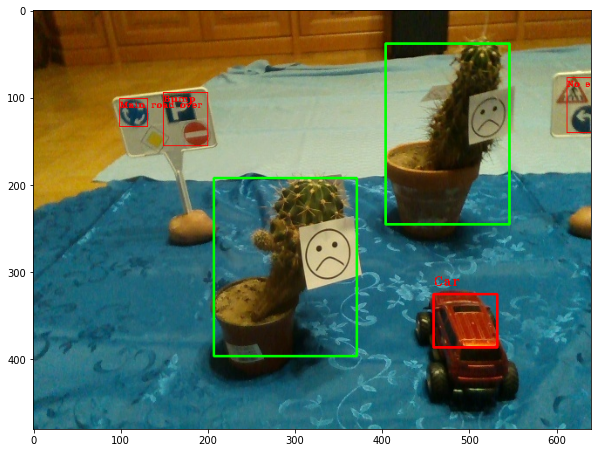

In [16]:
# egyesitettttt **************** juhhhuuuuu ****** dunnnyezóóóóóó

img = cv2.imread("../HW/g2/rgb/1.jpg")
depth = cv2.imread("../HW/g2/depth/1.png",-1)

retRGB = egyesitettMain(img,depth)
plt.figure(figsize=(10,10))
plt.imshow(retRGB,cmap='gray')

In [0]:
import glob
i=0
for file in glob.glob("../HW/g1/rgb/*.*"):
  i=i+1
  imgBGR = cv2.imread(file)
  asd = file.split("/rgb/")
  asd.append(asd[1].split(".jpg"))

  depfile = cv2.imread(asd[0]+"/depth/"+asd[2][0]+".png",-1)

  retRGB = egyesitettMain(imgBGR,depfile)

  plt.figure(figsize=(10,10))
  plt.imshow(retRGB,cmap='gray')
  cv2.imwrite(("../HW/out/g4/"+str(i)+".jpg"),cv2.cvtColor(retRGB, cv2.COLOR_RGB2BGR))